In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BC= pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')

In [4]:
BC.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# EDA

In [4]:
target= BC["Attrition_Flag"]

<Axes: xlabel='Attrition_Flag'>

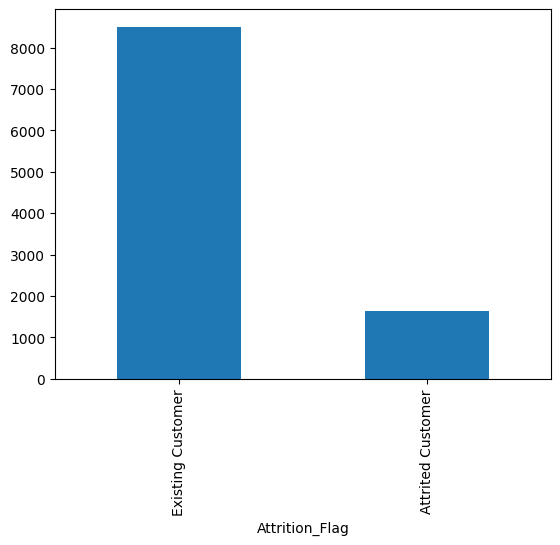

In [7]:
target.value_counts().plot.bar()

In [5]:
ctg = BC.columns[BC.dtypes=='object']
num = BC.columns[BC.dtypes!='object']
print(ctg)
print(num)

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


## Univariable

In [ ]:
N = len(num)
  
fig = plt.figure(figsize=(18, 5*N ))
    
for i,col in enumerate(num):
    plt.subplot(N,3,1+i)
        
    sns.histplot(BC[col],bins=50 , kde = True)
       
    plt.tight_layout()

In [ ]:
NC = len(ctg)
  
fig = plt.figure(figsize=(15, 5 * NC))
    
for i, col in enumerate(ctg):
    plt.subplot(NC, 2, 1 + i)
        
    sns.countplot(data=BC, x=col)
        
plt.tight_layout()
plt.show()

## Bivariable

In [ ]:
N = len(num)
  
fig = plt.figure(figsize=(18, 5*N ))
    
for i,col in enumerate(num):
    plt.subplot(N,3,1+i)
        
    sns.histplot(data=BC, x=col,bins=50 , kde = True, hue = 'Attrition_Flag')
       
    plt.tight_layout()

In [ ]:
NC = len(ctg)
  
fig = plt.figure(figsize=(15, 5 * NC))
    
for i, col in enumerate(ctg):
    plt.subplot(NC, 2, 1 + i)
        
    sns.countplot(data=BC, x=col, hue = 'Attrition_Flag')
        
plt.tight_layout()
plt.show()

## Multivariable

In [ ]:
sns.pairplot(df, vars=['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',],
             hue='Attrition_Flag', diag_kind='kde')
plt.show()

In [ ]:
# Group by multiple categorical features and attrition
grouped_data = df.groupby(['Education_Level', 'Income_Category'])['Attrition_Flag'].value_counts(normalize=True).unstack()
print(grouped_data)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D with three key variables
ax.scatter(df['Customer_Age'], df['Months_on_book'], df['Credit_Limit'], c=(df['Attrition_Flag'] == 'Attrited Customer'), cmap='coolwarm')
ax.set_xlabel('Customer Age')
ax.set_ylabel('Months on Book')
ax.set_zlabel('Credit Limit')
plt.show()

# Preprocessing

In [53]:
features=BC.drop(["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2","Attrition_Flag"], axis=1)

features.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [24]:
features.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
ctg_new = ctg[1:]
ctg_new

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [26]:
features[ctg_new[1]]

0        High School
1           Graduate
2           Graduate
3        High School
4         Uneducated
            ...     
10122       Graduate
10123        Unknown
10124    High School
10125       Graduate
10126       Graduate
Name: Education_Level, Length: 10127, dtype: object

In [8]:
for i in range(len(ctg_new)) : 
    print(features[ctg_new[i]].value_counts())
    print("---------------------------------")

Gender
F    5358
M    4769
Name: count, dtype: int64
---------------------------------
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
---------------------------------
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
---------------------------------
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
---------------------------------
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
---------------------------------


In [9]:
f_ctg = features.columns[features.dtypes=='object']
f_num = features.columns[features.dtypes!='object']

In [29]:
list(f_ctg)
list(f_num)

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [54]:
features[f_ctg].head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


## Imputer

In [55]:
from sklearn.impute import SimpleImputer

# Create an imputer object with the strategy to replace 'Unknown' with the most frequent value
category_imputer = SimpleImputer(missing_values='Unknown', strategy='most_frequent')

# Apply the imputer to each column
f_ctg_imputed = pd.DataFrame(imputer.fit_transform(features[f_ctg]), columns=f_ctg)

In [12]:
for i in range(len(f_ctg)) : 
    print(f_ctg_imputed[f_ctg[i]].value_counts())
    print("---------------------------------")

Gender
F    5358
M    4769
Name: count, dtype: int64
---------------------------------
Education_Level
Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
---------------------------------
Marital_Status
Married     5436
Single      3943
Divorced     748
Name: count, dtype: int64
---------------------------------
Income_Category
Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64
---------------------------------
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
---------------------------------


In [56]:
features[["Gender","Education_Level","Marital_Status","Income_Category","Card_Category"]]= f_ctg_imputed

In [14]:
features.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# def eduction_transformer(features):
#     return features["Education_Level"].map({
#     "Graduate": 3,
# "High School": 1,
# "Uneducated": 0,
# "College" : 2,
# "Post-Graduate": 4,
# "Doctorate":   5
# })
# # import packages
# from sklearn.base import BaseEstimator, TransformerMixin


## Encoder

In [57]:
from sklearn.preprocessing import OrdinalEncoder

edc_level = [
    ["Uneducated","High School","College","Graduate","Post-Graduate", "Doctorate"],
    ["Less than $40K","$40K - $60K","$60K - $80K" ,"$80K - $120K","$120K +" ],
    ["Blue","Silver","Gold","Platinum"]
]

ordinal_encoder = OrdinalEncoder(categories= edc_level)

features[['Education_Level',"Income_Category","Card_Category"]] = encoder.fit_transform(features[['Education_Level',"Income_Category","Card_Category"]])


In [59]:
from sklearn.preprocessing import OneHotEncoder


onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

encoded_data = onehot_encoder.fit_transform(features[['Gender', 'Marital_Status']])

encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['Gender', 'Marital_Status']))

df = pd.concat([features, encoded_df], axis=1)


In [65]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() # for the target

encoded_target = label_encoder.fit_transform(BC["Attrition_Flag"])

tg = pd.DataFrame(encoded_target, columns=["Attrition_Flag_Label"])

# inspect the mappings between the original labels and encoded values
label_mappings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mappings:", label_mappings)


Label Mappings: {'Attrited Customer': 0, 'Existing Customer': 1}


In [62]:
df=df.drop(["Gender","Marital_Status"], axis=1)


In [37]:
df.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single
0,45,3,1.0,2.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1.0,1.0,0.0
1,49,5,3.0,0.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.0,0.0,1.0
2,51,3,3.0,3.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1.0,1.0,0.0
3,40,4,1.0,0.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.0,1.0,0.0
4,40,3,0.0,2.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1.0,1.0,0.0


## Correlation

In [19]:
df_corr= pd.concat([tg,df],axis=1)


<Axes: >

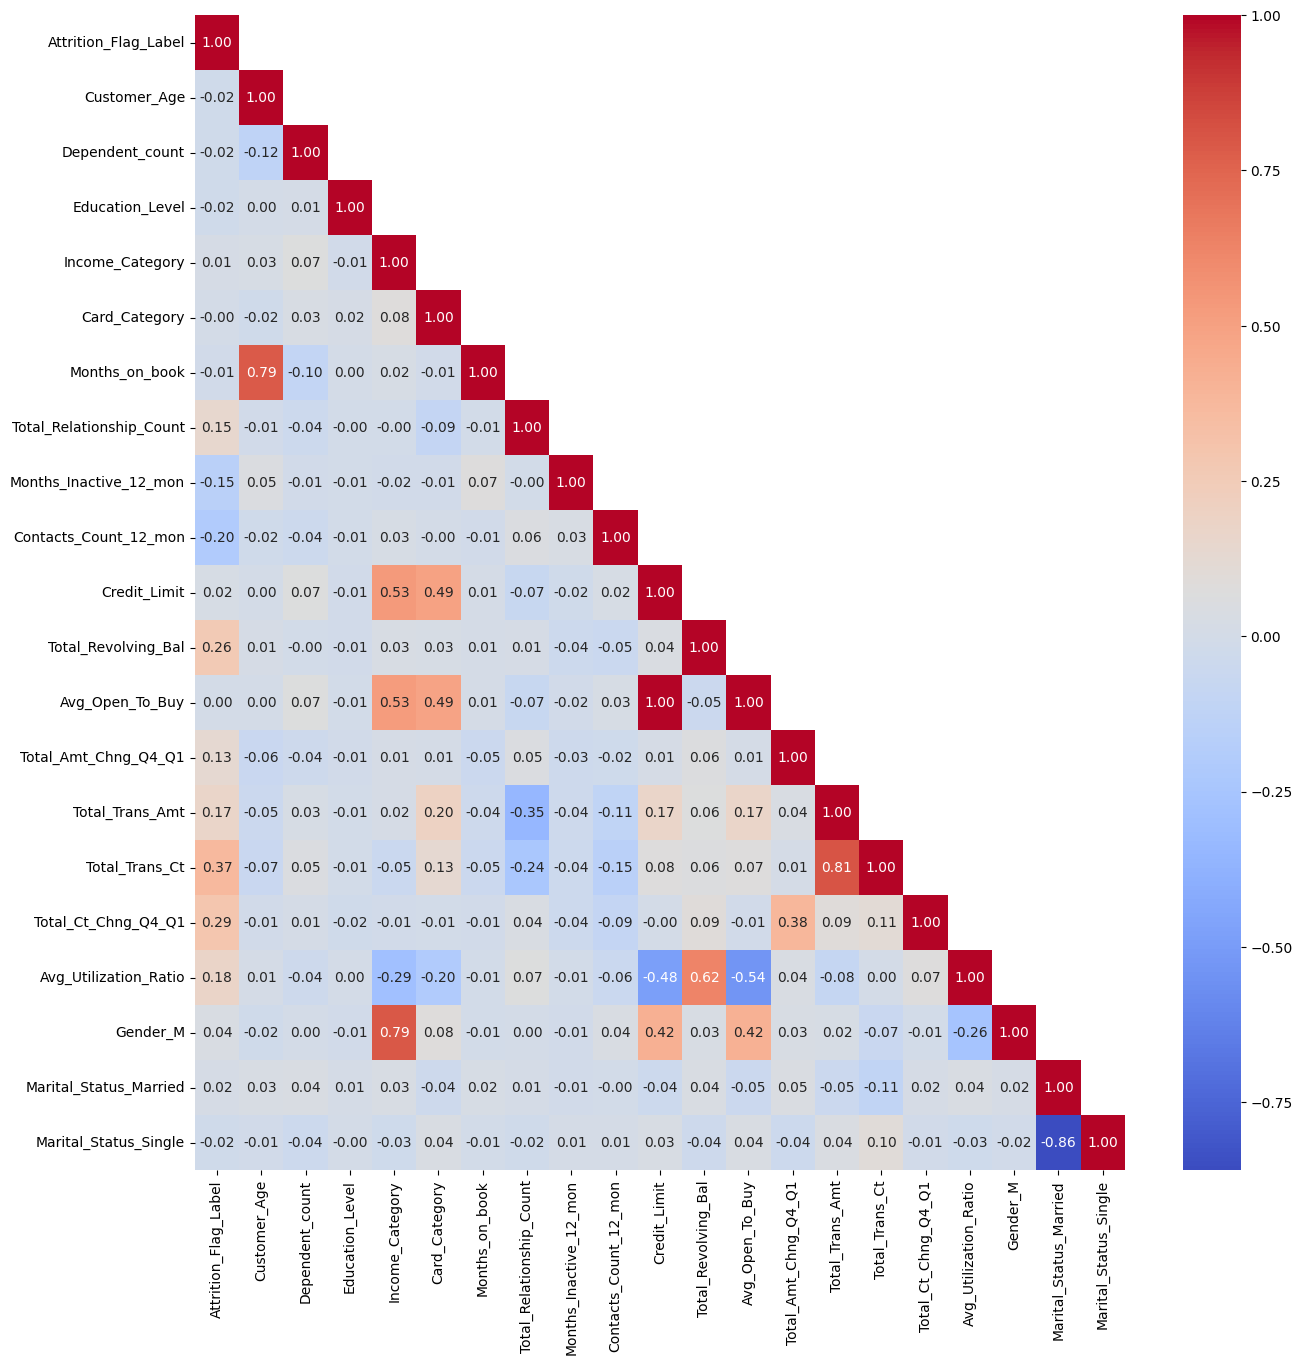

In [30]:
plt.figure(figsize=(15,15))

corr = df_corr.corr()

masked_corr = corr.where(np.tril(np.ones(corr.shape)).astype(bool))

sns.heatmap(masked_corr, annot=True, cmap="coolwarm", fmt=".2f")
#sns.heatmap(df_corr.corr(), annot= True, cmap= "coolwarm",  fmt=".2f", mask=mask)

## Scaling

In [20]:
X = df
y = target

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)


## Resampling

In [33]:
y.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [22]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after SMOTE
from collections import Counter
print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")


Original class distribution: Counter({'Existing Customer': 5957, 'Attrited Customer': 1131})
Resampled class distribution: Counter({'Existing Customer': 5957, 'Attrited Customer': 5957})


In [23]:
print(y_resampled.value_counts())
y_train.value_counts()

Attrition_Flag
Existing Customer    5957
Attrited Customer    5957
Name: count, dtype: int64


Attrition_Flag
Existing Customer    5957
Attrited Customer    1131
Name: count, dtype: int64

# Modeling

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X, y) # no resampling

y_pred_noresample = model.predict(X_test)
print(classification_report(y_test, y_pred_noresample))

                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       496
Existing Customer       1.00      1.00      1.00      2543

         accuracy                           1.00      3039
        macro avg       1.00      1.00      1.00      3039
     weighted avg       1.00      1.00      1.00      3039



In [25]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled) # with resampling

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


                   precision    recall  f1-score   support

Attrited Customer       0.89      0.87      0.88       496
Existing Customer       0.97      0.98      0.98      2543

         accuracy                           0.96      3039
        macro avg       0.93      0.92      0.93      3039
     weighted avg       0.96      0.96      0.96      3039



<Axes: >

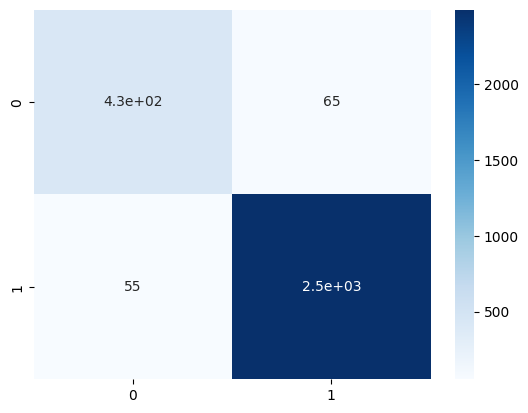

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='Blues', annot=True)


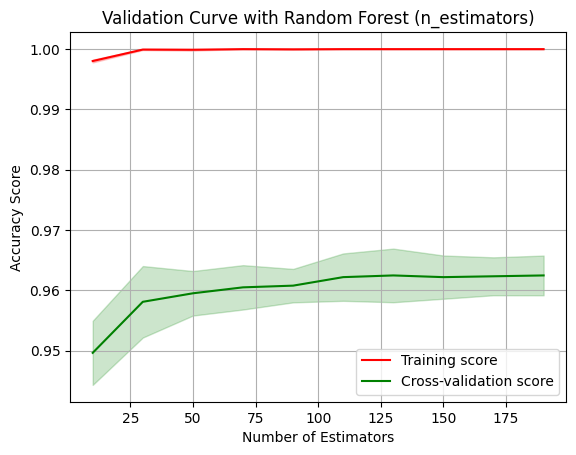

In [32]:
from sklearn.model_selection import validation_curve
param_range = np.arange(10, 210, 20)

# Calculate training and validation scores using validation_curve
train_scores, valid_scores = validation_curve(
    rf, X_train, y_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)
# Compute the mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot validation curve
plt.figure()
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, valid_mean, label="Cross-validation score", color="g")

# Fill between the lines for standard deviation
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, color="g", alpha=0.2)

# Add labels and title
plt.title("Validation Curve with Random Forest (n_estimators)")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_resampled, y_resampled) # with resampling

knn.score(X_test, y_test)

0.8532411977624218

In [33]:
knn.fit(X_train, y_train) # without resampling

knn.score(X_test, y_test)

0.9002961500493584

In [35]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

                   precision    recall  f1-score   support

Attrited Customer       0.82      0.49      0.62       496
Existing Customer       0.91      0.98      0.94      2543

         accuracy                           0.90      3039
        macro avg       0.87      0.74      0.78      3039
     weighted avg       0.89      0.90      0.89      3039



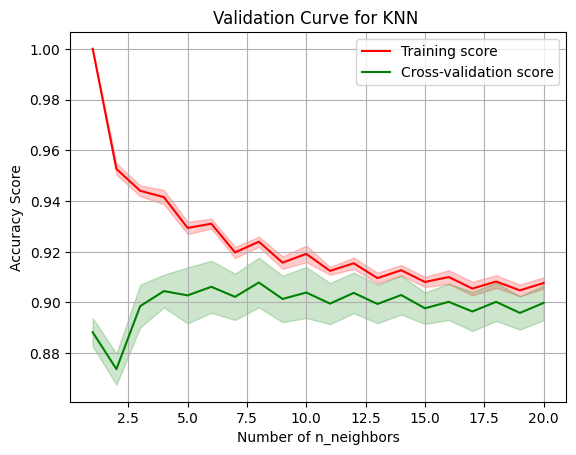

In [28]:

param_range = np.arange(1, 21)

# Utiliser la validation curve pour calculer les scores de validation et de training
train_scores_knn, valid_scores_knn = validation_curve(
    knn,
    X_train, y_train,
    param_name="n_neighbors",
    param_range=param_range,
    cv=5,
    scoring="accuracy"
)

# Compute the mean and standard deviation of training and validation scores
train_mean_knn = np.mean(train_scores, axis=1)
train_std_knn = np.std(train_scores, axis=1)
valid_mean_knn = np.mean(valid_scores, axis=1)
valid_std_knn = np.std(valid_scores, axis=1)

# Plot validation curve
plt.figure()
plt.plot(param_range, train_mean_knn, label="Training score", color="r")
plt.plot(param_range, valid_mean_knn, label="Cross-validation score", color="g")

# Fill between the lines for standard deviation
plt.fill_between(param_range, train_mean_knn - train_std_knn, train_mean_knn + train_std_knn, color="r", alpha=0.2)
plt.fill_between(param_range, valid_mean_knn - valid_std_knn, valid_mean_knn + valid_std_knn, color="g", alpha=0.2)

# Add labels and title
plt.title("Validation Curve for KNN ")
plt.xlabel("Number of n_neighbors")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [30]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_resampled, y_resampled) # with resampling

svc.score(X_test, y_test)

0.920697597894044

In [34]:
svc.fit(X_train, y_train) # without resampling

svc.score(X_test, y_test)

0.9299111549851925

In [37]:
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

                   precision    recall  f1-score   support

Attrited Customer       0.89      0.65      0.75       496
Existing Customer       0.94      0.98      0.96      2543

         accuracy                           0.93      3039
        macro avg       0.91      0.82      0.86      3039
     weighted avg       0.93      0.93      0.93      3039



In [ ]:
from sklearn.model_selection import learning_curve


svc = SVC()

# Define a range of values for the hyperparameter 'C'
param_range = np.logspace(-3, 3, 10)

# Use validation_curve to calculate the training and validation scores
train_scores, valid_scores = validation_curve(
    svc,
    X_train, y_train,
    param_name="C",  # 'C' is a common parameter for SVC
    param_range=param_range,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy"
)
# Compute the mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot validation curve
plt.figure()
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, valid_mean, label="Cross-validation score", color="g")

# Fill between the lines for standard deviation
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r", alpha=0.2)
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, color="g", alpha=0.2)

# Add labels and title
plt.title("Validation Curve for KNN ")
plt.xlabel("Number of n_neighbors")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [26]:
np.linspace(0.1, 1.0, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

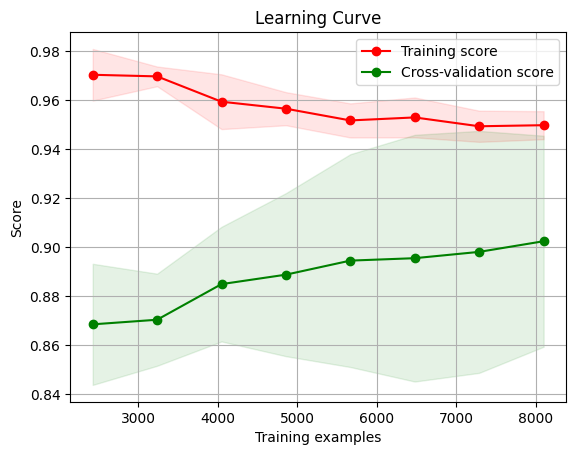

In [73]:

# Génération de la courbe d'apprentissage
train_sizes, train_scores, val_scores = learning_curve(
    svc, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcul des moyennes et des écarts-types
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot des courbes d'apprentissage
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [66]:
# Save all steps using joblib
import joblib

joblib.dump(category_imputer, 'categorical_imputer.pkl')
joblib.dump(onehot_encoder, 'onehot_encoder.pkl')
joblib.dump(ordinal_encoder, 'ordinal_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

## Set up PipeLine

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

X = features
y = BC['Attrition_Flag']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


one_hot_cols = ['Gender', 'Marital_Status']
ordinal_cols = ['Education_Level', 'Income_Category', 'Card_Category']
numerical_cols = list(f_num)

# Create imputers for missing values
numerical_imputer = SimpleImputer(strategy='median')  # Use median imputation for numerical columns
categorical_imputer = SimpleImputer(missing_values='Unknown',strategy='most_frequent')  # Use most frequent category for categorical columns

# Create a ColumnTransformer with different encoders and imputers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer),      # Impute missing values in numerical columns
            ('scaler', StandardScaler())         # Scale numerical columns
        ]), numerical_cols),
        
        ('onehot', Pipeline(steps=[
            ('imputer', categorical_imputer),    # Impute missing values in categorical columns
            ('encoder', OneHotEncoder(drop='first'))  # OneHotEncode specified columns
        ]), one_hot_cols),

        ('ordinal', Pipeline(steps=[
            ('imputer', categorical_imputer),    # Impute missing values in categorical columns
            ('encoder', OrdinalEncoder())        # OrdinalEncode specified columns
        ]), ordinal_cols)
    ])

# Create a pipeline that first preprocesses data and then fits a model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), 
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Fit the model pipeline
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rfp = model_pipeline.predict(X_test)

print("Predictions:", label_encoder.inverse_transform(y_pred_rfp))  # To decode back to original labels


Predictions: ['Existing Customer' 'Existing Customer' 'Existing Customer' ...
 'Existing Customer' 'Existing Customer' 'Existing Customer']


In [23]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_pred_rfp))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       496
           1       0.97      0.98      0.98      2543

    accuracy                           0.96      3039
   macro avg       0.93      0.92      0.92      3039
weighted avg       0.96      0.96      0.96      3039



In [ ]:
# Compute validation curve
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train, param_name="classifier__n_estimators", param_range=param_range, 
    cv=5, scoring="accuracy", n_jobs=-1)

# Calculate the mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Score", color="blue")
plt.plot(param_range, val_mean, label="Validation Score", color="green")

# Add error bars
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2)

# Plot settings
plt.title("Validation Curve with RandomForest Pipeline")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

## Hyper-parameters Turning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20]
}

# Initialize GridSearchCV with the pipeline
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_


## Feature importances

In [ ]:

feature_importances = best_rf.feature_importances_

# Display feature importance alongside feature names
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

In [ ]:
y_pred_GS= best_model.predict(X_test)
print(classification_report(y_test, y_pred_GS))

In [ ]:
# Get the best hyperparameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

In [42]:
import joblib

joblib.dump(best_rf, 'GridSeearchCV_model.pkl')
joblib.dump(model_pipeline, 'rf_model_pipeline.pkl' )

['rf_model_pipeline.pkl']

In [ ]:
# Load the GridSearchCV model
best_model = joblib.load('/kaggle/working/GridSearchCV_model.pkl')

# Load the pipeline model
model_pipeline = joblib.load('/kaggle/working/rf_model_pipeline.pkl')